<a href="https://colab.research.google.com/github/techisteps/KaggleCompetition/blob/main/Kaggle_Housing_Prices_20240524.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Upload Kaggle token file
from google.colab import files
files.upload_file(filename = "kaggle.json")

# Setup Kaggle environment
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/ && chmod 600 /root/.kaggle/kaggle.json
!rm /content/kaggle.json


# Download and extract project data
!kaggle competitions download -c home-data-for-ml-course
!unzip /content/home-data-for-ml-course.zip

Saved kaggle.json to /content/kaggle.json
  0% 0.00/386k [00:00<?, ?B/s]
100% 386k/386k [00:00<00:00, 69.7MB/s]
Archive:  /content/home-data-for-ml-course.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: sample_submission.csv.gz  
  inflating: test.csv                
  inflating: test.csv.gz             
  inflating: train.csv               
  inflating: train.csv.gz            


# Analysis
You can now start your analysis

In [145]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer, normalize

file_train = "/content/train.csv"
file_test = "/content/test.csv"
file_sample_submission = "/content/sample_submission.csv"
file_data_disc = "/content/data_description.txt"

train_data = pd.read_csv(file_train, index_col="Id")
test_data = pd.read_csv(file_test, index_col="Id")
target_y = train_data['SalePrice']
train_y = train_data

# train_data.drop('SalePrice', axis=1, inplace=True

# train_data.drop('SalePrice', axis=1, inplace=True)
# train_data = train_data.drop('SalePrice', axis=1)


features = train_data.columns.to_list()

features_obj = train_data.select_dtypes(include = ['O', 'object']).columns
features_num = train_data.select_dtypes(include = ['float64', 'int64']).columns

# EDA and Feature Engineering

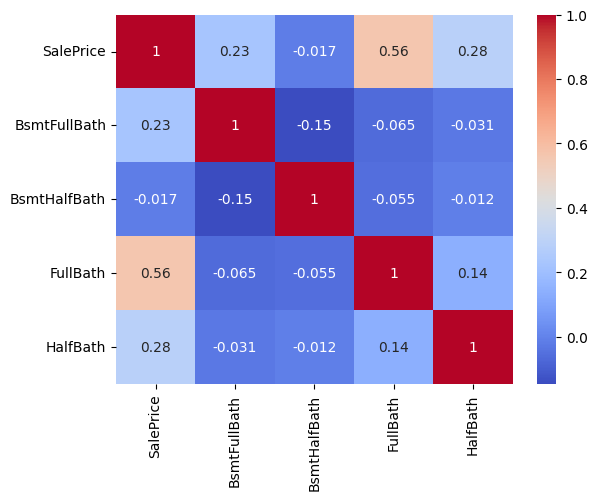

In [148]:
import seaborn as sns
tmp = train_data[['SalePrice', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']]
# sns.scatterplot(x="SalePrice", y=col, data=train_data[[col, 'SalePrice']]);
sns.heatmap(tmp.corr(), annot=True, cmap='coolwarm');
??sns.heatmap

In [ ]:
# display.max_columns = 100
# t = features_num
# Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
#        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
#        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
#        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')
# train_data[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual','SalePrice']].corr()
# target_y.corr(train_data['LotArea'])
train_data = train_data.drop(columns= ['MoSold', 'YrSold','3SsnPorch'], axis=1)

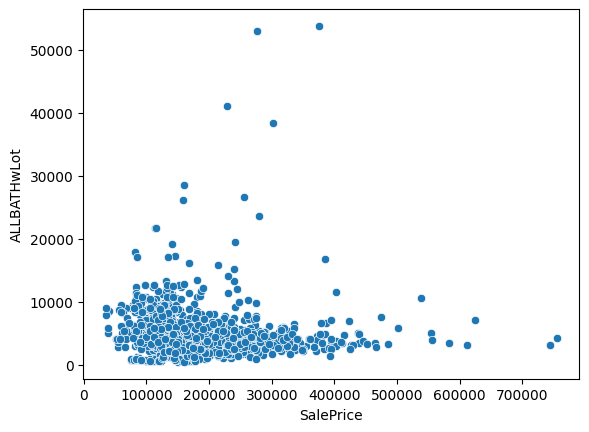

In [119]:

import seaborn as sns
nor = Normalizer()
# nor.fit(train_data)
# tmp = train_data['SalePrice']
train_data['ALLBATH'] = train_data['BsmtFullBath'] + train_data['BsmtHalfBath'] + train_data['FullBath'] + train_data['HalfBath']
train_data['ALLBATHwLot'] = train_data['LotArea'] / (train_data['BsmtFullBath'] + train_data['BsmtHalfBath'] + train_data['FullBath'] + train_data['HalfBath'])
train_data['ALLFULLBATH'] = train_data['BsmtFullBath'] + train_data['FullBath']
train_data['ALLHALFBATH'] = train_data['BsmtHalfBath'] + train_data['HalfBath']
# tmp = train_data[['SalePrice', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']]
tmp = train_data[['SalePrice', 'ALLBATH', 'ALLFULLBATH', 'ALLHALFBATH','ALLBATHwLot']]
# tmp = pd.DataFrame(nor.transform(tmp), columns = tmp.columns)
tmp.describe()
# sns.pairplot(tmp, hue="BsmtFullBath")
sns.scatterplot(x="SalePrice", y="ALLBATHwLot", data=tmp);
# sns.scatterplot(x="SalePrice", y="1stFlrSF", hue="LotArea", size="LotFrontage", data=tmp);
# ??sns.scatterplot
# tmp = train_data[['SalePrice', 'BsmtUnfSF', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt']]
# sns.pairplot(tmp, hue="LotArea")
# ??sns.pairplot
# sns.boxplot(x="Alley", y="SalePrice", hue="LotFrontage", palette='YlGnBu', data=train_data);

0.31585622711605554


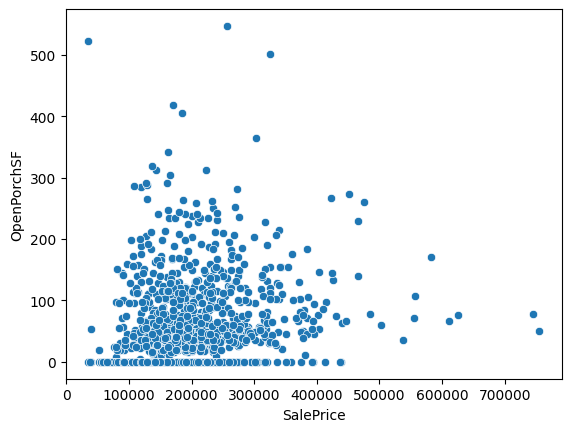

In [ ]:
import seaborn as sns
def plotCorr(col):
  print(train_data['SalePrice'].corr(train_data[col]))
  sns.scatterplot(x="SalePrice", y=col, data=train_data[[col, 'SalePrice']]);

plotCorr("OpenPorchSF")

In [101]:
# Analysis
# train_data['SFT'] = train_data['1stFlrSF'] + train_data['2ndFlrSF'] + train_data['LowQualFinSF'] + train_data['GrLivArea']
# tmp = train_data[['SalePrice', 'SFT']]
# tmp.describe()
# sns.scatterplot(x="SalePrice", y="SFT", data=tmp);

# Action
train_data['SFT'] = train_data['1stFlrSF'] + train_data['2ndFlrSF'] + train_data['LowQualFinSF'] + train_data['GrLivArea']
train_data.drop(columns=['SalePrice','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea'], axis=1, inplace=True)

test_data['SFT'] = test_data['1stFlrSF'] + test_data['2ndFlrSF'] + test_data['LowQualFinSF'] + test_data['GrLivArea']
test_data.drop(columns=['1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea'], axis=1, inplace=True)

# train_data.drop('SFT', axis=1, inplace=True)
# test_data.drop('SFT', axis=1, inplace=True)

In [ ]:
# train_data_imp.select_dtypes(include = ['O']).columns
# train_data_imp.MSZoning.unique()

# !pip install ydata-profiling

from ydata_profiling import ProfileReport
tmp = train_data[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2']]
profile = ProfileReport(tmp, title="Profiling Report")
# # profile.to_widgets()
# # profile.to_notebook_iframe()
profile.to_file("your_report.html")


In [126]:
train_data[features_obj]
# train_data.MSSubClass.unique()

train_data["MSSubClassTMP"] = train_data.MSSubClass.apply(lambda x: str(x))
train_data.drop(columns=["MSSubClass"], inplace=True)
train_data.rename(columns={"MSSubClassTMP": "MSSubClass"}, inplace=True)
train_data[["MSSubClass"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MSSubClass  1460 non-null   object
dtypes: object(1)
memory usage: 22.8+ KB


In [127]:
train_data.OverallQual.unique()

train_data["OverallQualTMP"] = train_data.OverallQual.apply(lambda x: str(x))
train_data.drop(columns=["OverallQual"], inplace=True)
train_data.rename(columns={"OverallQualTMP": "OverallQual"}, inplace=True)
train_data[["OverallQual"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OverallQual  1460 non-null   object
dtypes: object(1)
memory usage: 22.8+ KB


In [128]:
train_data.OverallCond.unique()

train_data["OverallCondTMP"] = train_data.OverallCond.apply(lambda x: str(x))
train_data.drop(columns=["OverallCond"], inplace=True)
train_data.rename(columns={"OverallCondTMP": "OverallCond"}, inplace=True)
train_data[["OverallCond"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OverallCond  1460 non-null   object
dtypes: object(1)
memory usage: 22.8+ KB


# Imputer null values from numeric columns
---

In [129]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer

features = train_data.columns.to_list()

features_obj = train_data.select_dtypes(include = ['O', 'object']).columns
features_num = train_data.select_dtypes(include = ['float64', 'int64']).columns


numeric_transformation = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        # ("normalizer", Normalizer()),

    ]
)

object_transformation = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="xxx")),
        ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
    ]
)


preprocessor = ColumnTransformer(
    transformers=[
        ("nums", numeric_transformation , features_num),
        ("objs", object_transformation, features_obj),
    ]
)


preprocessor.fit(train_data)

train_data_imp = pd.DataFrame( preprocessor.transform(train_data), columns = preprocessor.get_feature_names_out())
test_data_imp = pd.DataFrame( preprocessor.transform(test_data), columns = preprocessor.get_feature_names_out())

print("Type of train_data_imp is: ", type(train_data_imp))
train_data_imp.info()



Type of train_data_imp is:  <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 334 entries, nums__LotFrontage to objs__OverallCond_9
dtypes: float64(334)
memory usage: 3.7 MB


In [139]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(train_data_imp)


train_data_imp_pca = pca.transform(train_data_imp)
pca.explained_variance_ratio_

array([0.16041045, 0.07331221, 0.06318314, 0.04330732, 0.0294759 ,
       0.02667992, 0.02505619, 0.02360354, 0.02249575, 0.02203017,
       0.02113407, 0.02111137, 0.02044228, 0.01997282, 0.01856558,
       0.01802254, 0.01790649, 0.01708545, 0.01659414, 0.01495456,
       0.01452867, 0.01296256, 0.01250145, 0.01236742, 0.00967874,
       0.00910014, 0.00882653, 0.00834325, 0.0072749 , 0.00662645,
       0.00644842, 0.00610272, 0.00592179, 0.00569398, 0.00552854,
       0.00542734, 0.00519586, 0.00497067, 0.00464294, 0.00452989,
       0.00437232, 0.00430605, 0.00414011, 0.00401879, 0.00385741,
       0.00378295, 0.00362539, 0.00354611, 0.00349377, 0.00334932])

In [142]:
from xgboost import XGBRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

train_X, val_X, train_y, val_y = train_test_split(train_data_imp, target_y, random_state=1)
xgbr_model = XGBRegressor(random_state=1, gamma= 0.01, learning_rate= 0.1, max_depth= 5, n_estimator= 100)
hgbr_model = HistGradientBoostingRegressor(learning_rate= 0.1, loss= 'absolute_error', max_depth= 5, max_iter= 300, random_state=1)
rf_model = RandomForestRegressor(criterion= 'poisson', max_depth= 7, n_estimators= 300, random_state=1)

search_space = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [2, 5, 7],
    # "gamma": [0.01, 0.1],
    "learning_rate": [0.001, 0.01, 0.1, 1]
}

hgbr_search_space = {
    "loss": ["squared_error", "absolute_error"],
    "learning_rate": [0.001, 0.01, 0.1, 1],
    "max_iter": [100, 200, 300],
    "max_depth": [2, 5, 7],
}

rf_search_space = {
    "n_estimators": [100, 200, 300],
    "criterion": ["squared_error", "friedman_mse", "poisson"],
    "max_depth": [2, 5, 7],
    # "gamma": [0.01, 0.1],
    # "learning_rate": [0.001, 0.01, 0.1, 1]
}

# GS = GridSearchCV(estimator= hgbr_model, param_grid= hgbr_search_space, cv=5, scoring=["neg_mean_absolute_error","r2"], refit="neg_mean_absolute_error", verbose=4)
# GS.fit(train_X, train_y)
# GS.best_params_

hgbr_model.fit(train_X, train_y)
hgbr_model.score(val_X, val_y)

0.8622119377548122

In [143]:
# GS.best_params_
# GS.best_score_
# GS.best_estimator_
# pd.DataFrame(GS.cv_results_).sort_values(by="rank_test_neg_mean_absolute_error")[['mean_test_neg_mean_absolute_error','std_test_neg_mean_absolute_error']]

# pd.DataFrame(GS.cv_results_).columns
# ['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
#        'param_criterion', 'param_max_depth', 'param_n_estimators', 'params',
#        'split0_test_neg_mean_absolute_error',
#        'split1_test_neg_mean_absolute_error',
#        'split2_test_neg_mean_absolute_error',
#        'split3_test_neg_mean_absolute_error',
#        'split4_test_neg_mean_absolute_error',
#        'mean_test_neg_mean_absolute_error', 'std_test_neg_mean_absolute_error',
#        'rank_test_neg_mean_absolute_error', 'split0_test_r2', 'split1_test_r2',
#        'split2_test_r2', 'split3_test_r2', 'split4_test_r2', 'mean_test_r2',
#        'std_test_r2', 'rank_test_r2']

rf_val_predictions = hgbr_model.predict(val_X)
rf_val_mae = mean_absolute_error(val_y, rf_val_predictions)
rf_val_mae


16394.139554873826

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor

train_X, val_X, train_y, val_y = train_test_split(train_data_imp, target_y, random_state=1)
# rf_model = HistGradientBoostingRegressor(random_state=1)
rf_model = XGBRegressor(random_state=1)
# rf_model = RandomForestRegressor(n_estimators=100, random_state=1)
rf_model.fit(train_X, train_y)
rf_model

rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(val_y, rf_val_predictions)
rf_val_mae

# rf_model.score(val_X, val_y)


16687.265004280824

In [ ]:
test_validation =  rf_model.predict(test_data_imp)

In [ ]:
submission = pd.DataFrame({'Id': test_data.Id, 'SalePrice': test_validation})
submission.to_csv('submission.csv', index=False)

In [ ]:
# !kaggle competitions submit home-data-for-ml-course -f submission.csv -m "Another submission through the Google Colab!"